In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
import seaborn as sns


In [74]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [76]:
df = {"x1":x[:,0] ,"x2":x[:,1] , "y":y }

In [78]:
dataset = pd.DataFrame(df)

In [80]:
dataset.head(3)

,x1,x2,y
0,-0.983098,0.913024,0
1,1.008984,-0.666989,1
2,0.828901,-0.194070,1


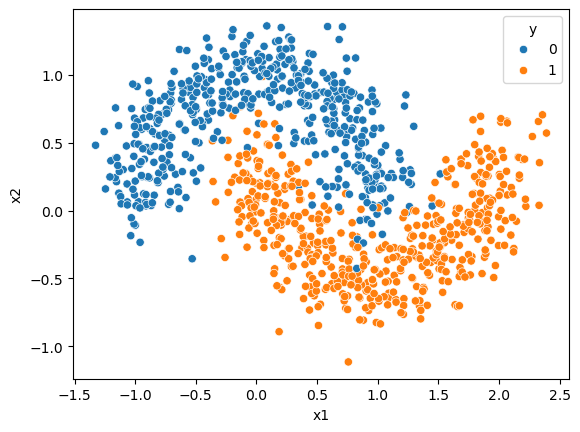

In [82]:
sns.scatterplot(x="x1" ,y= "x2" , data=dataset ,hue= "y" )
plt.show()

In [93]:
x_a =dataset.iloc[:,:-1]
y_a =dataset["y"]

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [107]:
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100 , dt.score(x_train,y_train)*100

(98.5, 100.0)

In [109]:
sv =SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100 , sv.score(x_train,y_train)*100

(98.0, 96.25)

In [113]:
gnb =GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)*100 , gnb.score(x_train,y_train)*100

(87.5, 85.625)

In [121]:
from sklearn.ensemble import VotingClassifier
li = [("dt1",DecisionTreeClassifier()) , ("sv1" , SVC()) ,("gnb1" , GaussianNB())]

In [133]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [135]:
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(96.875, 97.5)

In [139]:
prd = {"dt":dt.predict(x_test) ,"sv":sv.predict(x_test) ,"gnb":gnb.predict(x_test) , "vc":vc.predict(x_test)}
pd.DataFrame(prd)

,dt,sv,gnb,vc
0,0,0,1,0
1,0,0,0,0
2,1,1,1,1
3,1,1,0,1
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,1,1,1,1
198,0,0,1,0
